# 1.1  Введение

Имеется подготовленный список гипотез для увеличения выручки крупного интернет-магазина.

Требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Для начала импортируем необходимые библиотеки:

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

# 1.2  Шаг 1

Загрузим имеющиемся датасеты:

In [141]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 

In [142]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Таблица содержит данные по 9 гипотезам увеличения выручки с указанными параметрами Reach, Impact, Confidence, Effort.

Таблица hypothesis содержит следующие поля:
    
    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

In [143]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Здесь нас все утраивает. Пока оставляем все как есть.

Следующая таблица:

In [144]:
orders = pd.read_csv('/datasets/orders.csv') 

In [145]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
1048,4057562044,4134830387,2019-08-11,1720,B
1102,1941707234,199603092,2019-08-12,6438,A
318,3412626998,3282099314,2019-08-19,11985,A
250,3742152357,3950493862,2019-08-18,2339,A
118,4233533907,2378935119,2019-08-22,3390,A
213,394880746,3332057097,2019-08-02,2750,B
649,3544621373,621427706,2019-08-07,19260,B
277,3017343075,1261629107,2019-08-02,4877,B
1175,1373388206,3717692402,2019-08-14,2400,B
231,4129423775,71018815,2019-08-23,15485,B


Таблица hypothesis содержит данные по заказам и содержит следующие поля:
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

In [146]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Здесь нас не совсем устраивает формат поля data. Но пока ничего не меняем, просто имеем ввиду на будущее.

In [147]:
orders['date']= pd.to_datetime(orders['date'], format='%Y.%m.%d')

Любопытно посмотреть на поле revenue и его параметры:

In [148]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Text(0, 0.5, 'Кол-во значений')

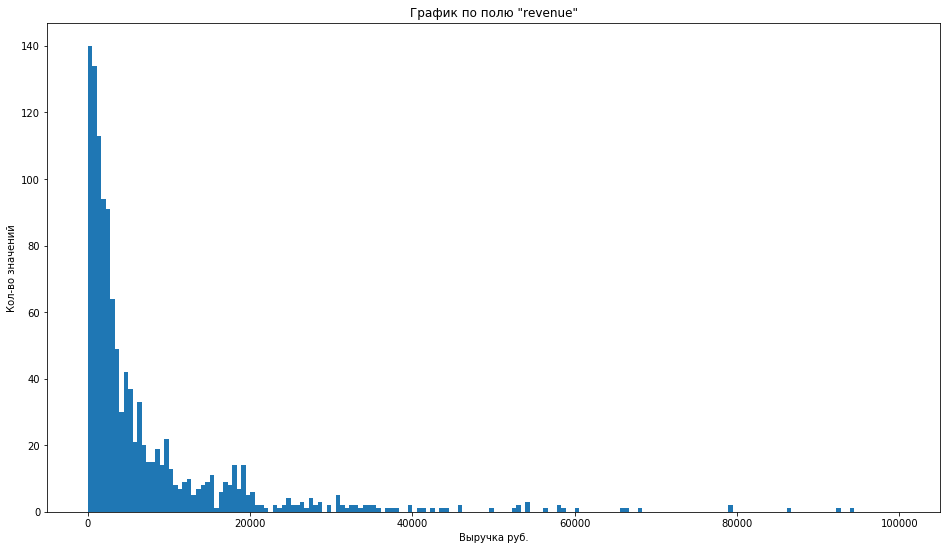

In [149]:
orders['revenue'].hist(bins = 180, figsize = (16,9), grid = False, range = (0, 100000))
plt.title('График по полю "revenue"')
plt.xlabel("Выручка руб.")
plt.ylabel("Кол-во значений")

Большое отличие между mean и median указывает на наличие выбросов в распредлении значений признака. Гистограмма и боксплот это подтверждают. В дальнейшем необходимо будет это учитывать и возможно избавляться. 

Следующая таблица:

In [150]:
visitors = pd.read_csv('/datasets/visitors.csv') 

In [151]:
visitors.sample(10)

,date,group,visitors
59,2019-08-29,B,531
1,2019-08-02,A,619
14,2019-08-15,A,628
38,2019-08-08,B,654
50,2019-08-20,B,560
36,2019-08-06,B,655
7,2019-08-08,A,610
47,2019-08-17,B,421
0,2019-08-01,A,719
46,2019-08-16,B,413


Таблица visitors содержит данные по посетителям и имеет следующие поля:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [152]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Формат поля data также, как и в прошлой таблице, не релевантен и также просто пока ничего не трогаем, просто отмечаем.

In [153]:
visitors['date']= pd.to_datetime(visitors['date'], format='%Y.%m.%d')

Посмотрим на поле с кол-вом визитов:

In [154]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Text(0, 0.5, 'Кол-во значений')

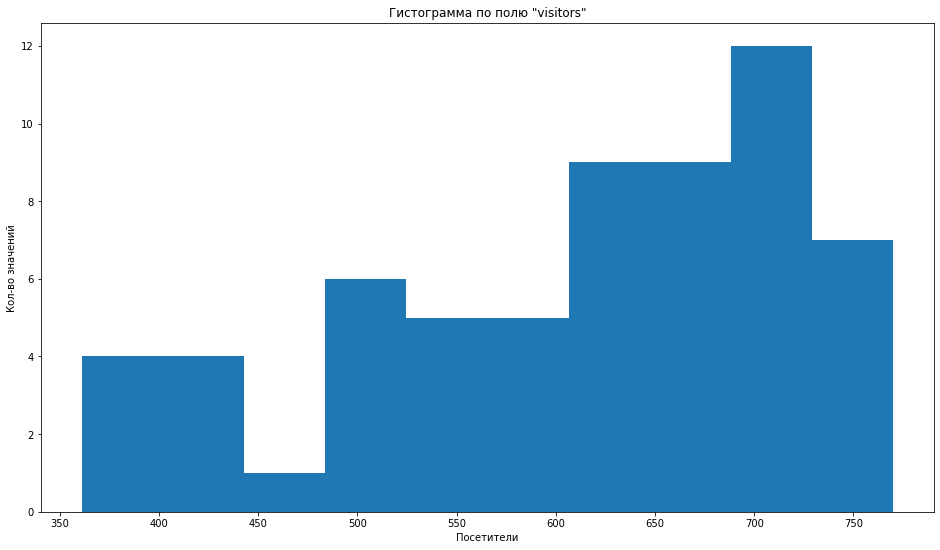

In [155]:
visitors['visitors'].hist(bins = 10, figsize = (16,9), grid = False)
plt.title('Гистограмма по полю "visitors"')
plt.xlabel("Посетители")
plt.ylabel("Кол-во значений")

Text(0, 0.5, 'Кол-во значений')

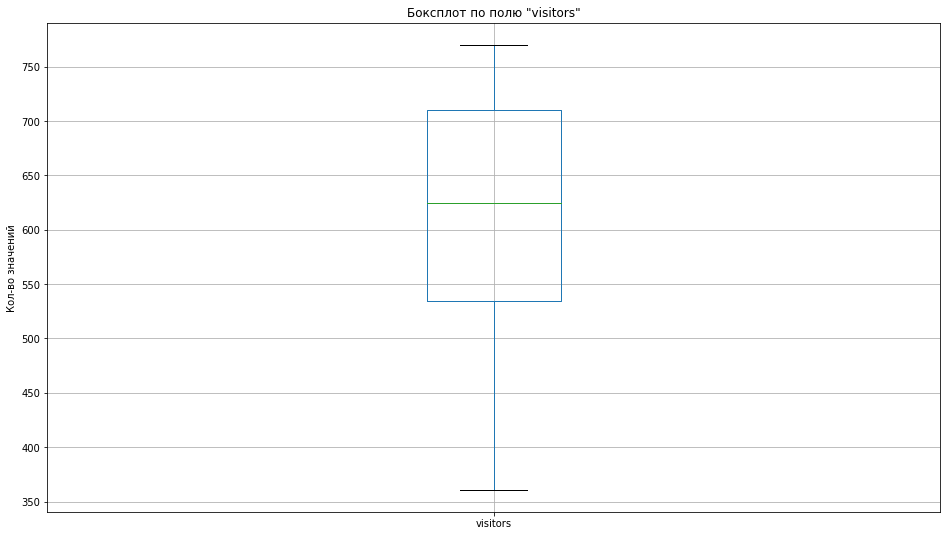

In [156]:
visitors.boxplot(column = 'visitors', figsize = (16, 9))
plt.title('Боксплот по полю "visitors"')
plt.ylabel("Кол-во значений")

Выбросов здесь особо не наблюдаем. Едем дальше.

# Шаг 2

Вернемся к таблице hypothesis. Задача - приоритезировать гипотезы.

Посмотрим на таблицу:

In [157]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим для начала фреймворк ICE.

In [158]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

Отсортируем новое поле по убыванию приоритета:

In [159]:
hypothesis.sort_values(by = 'ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Далее применим фреймворк RICE.

In [160]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 

Отсортируем теперь по убыванию значений в этом поле:

In [161]:
hypothesis.sort_values(by = 'RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Видим как влияет параметр Reach. Параметр который влияет на количество пользователей менеят картинку довольно сильно. Охват важен.

Гипотеза под № 8 "съехала" с первого места на 5-е. Это пожалуй наиболее "драматичное" изменение, в остальном "перемещения" не такие сильные.

Выходит, что наиболее перспективные первые в нашем случае это номера 7, 2, 0, 6.

# Шаг 3

Проналазируем результаты A/B-теста, которые описаны в таблицах orders и visitors.

In [162]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [163]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Для этого построим кумулятивные графики. Для это необходимо собрать кумулятивные данные.

Агрегируем значения:

In [164]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [165]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [166]:
datesGroups_2 = visitors[['date','group']].drop_duplicates() 
visitorsAggregated = datesGroups_2.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Объединим кумулятивные данные в одной таблице и присваивоим столбцам понятные названия:

In [167]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [168]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по группам A/B-тестирования:

Text(0, 0.5, 'Выручка')

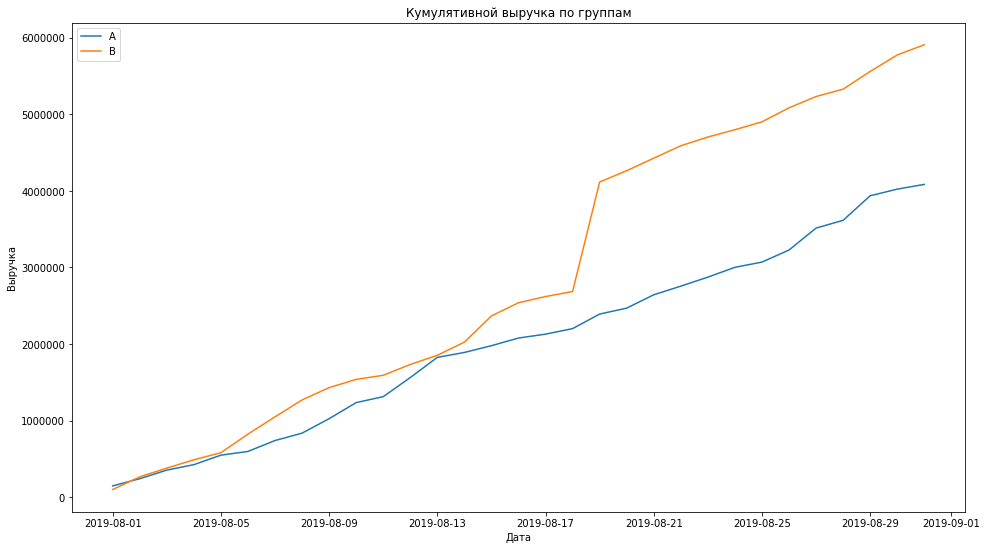

In [169]:
plt.figure(figsize=(16, 9))
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивной выручка по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка")

Выручка почти равномерно увеличивается в течение всего теста. Однако по группе В выручка резко растет в середине периода. В дальнейшем необходимо будет посмотреть, чем это обусловлено. Возможно влияние выбросов.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:


Text(0, 0.5, 'Средний чек')

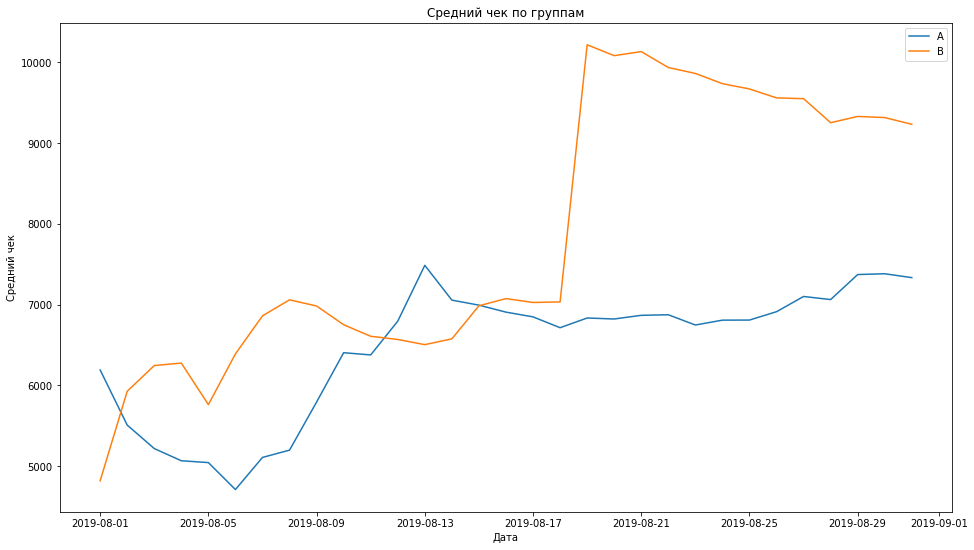

In [170]:
plt.figure(figsize=(16, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cредний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Средний чек")

По среднему чеку ситуация схожая. В группе В резкий рост ближе к середине периода. Хотя к концу теста показатели становятся более равномерными. Потенциально вероятне фактор влияния крупных заказов. 

Построим график относительного различия для среднего чека:

Text(0, 0.5, 'Средний чек')

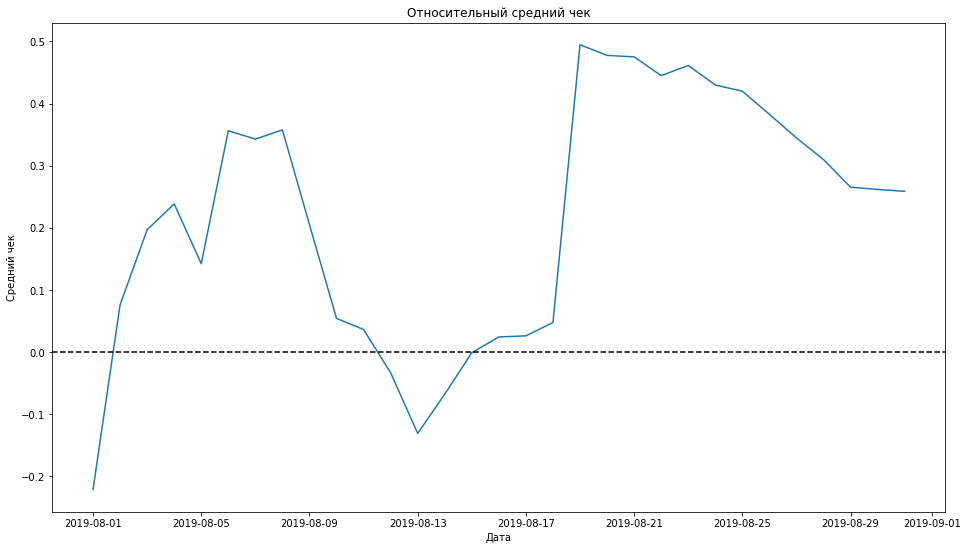

In [171]:
plt.figure(figsize=(16, 9))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительный средний чек')
plt.xlabel("Дата")
plt.ylabel("Средний чек")

График "скачет" примерное в том же месте, где и по группе В у нас происходит скачек на предыдущих графиках. Дополнительный аргумент в пользу наличия влияния доп. фактора.


Посмотрим теперь на конверсию.

In [172]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Text(0, 0.5, 'Конверсия')

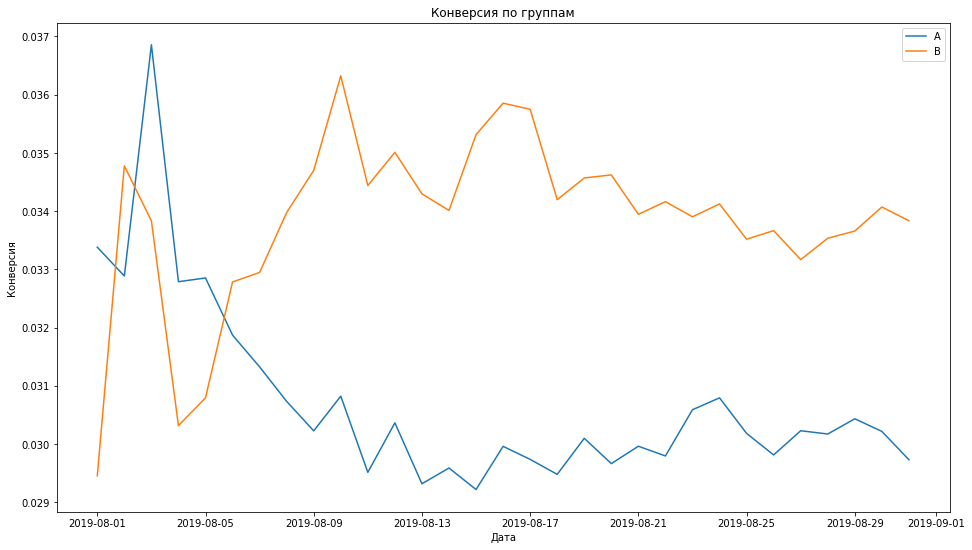

In [173]:
plt.figure(figsize=(16, 9))

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Конверсия по группам')
plt.xlabel("Дата")
plt.ylabel("Конверсия")


Резкие изменения в конверсии вначале теста видны для обоих групп. Далее В сильно вырвалась вперед с последующей консолидацией значений между группами.

Построим график относительного различия кумулятивных конверсий:
    

Text(0, 0.5, 'Конверсия')

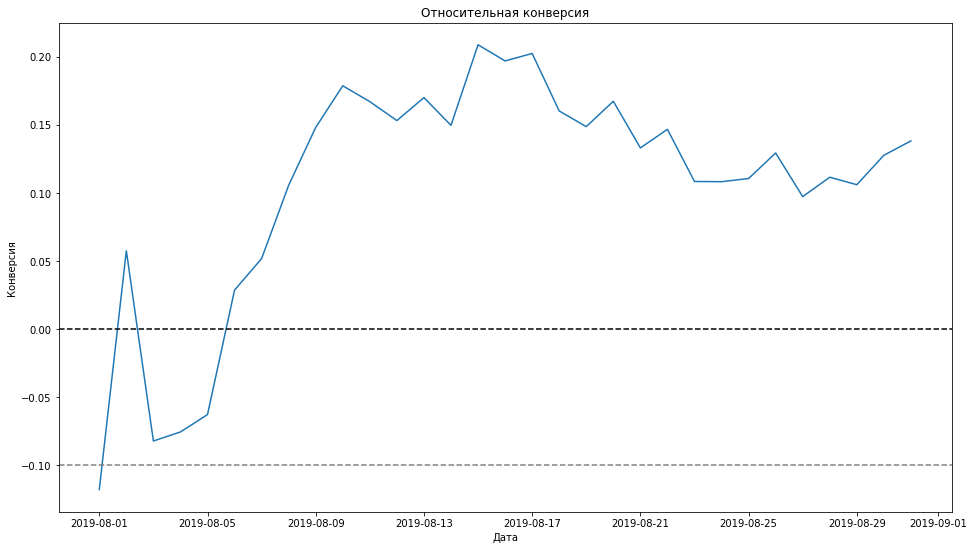

In [174]:
plt.figure(figsize=(16, 9))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительная конверсия')
plt.xlabel("Дата")
plt.ylabel("Конверсия")

Видим в начале сильный рост, после величина начинает затухать. Посмотрим далее на выбросы, которые могут заставлять общую картину сильно шуметь.

Построим точечный график количества заказов по пользователям:

In [106]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Пользователи')

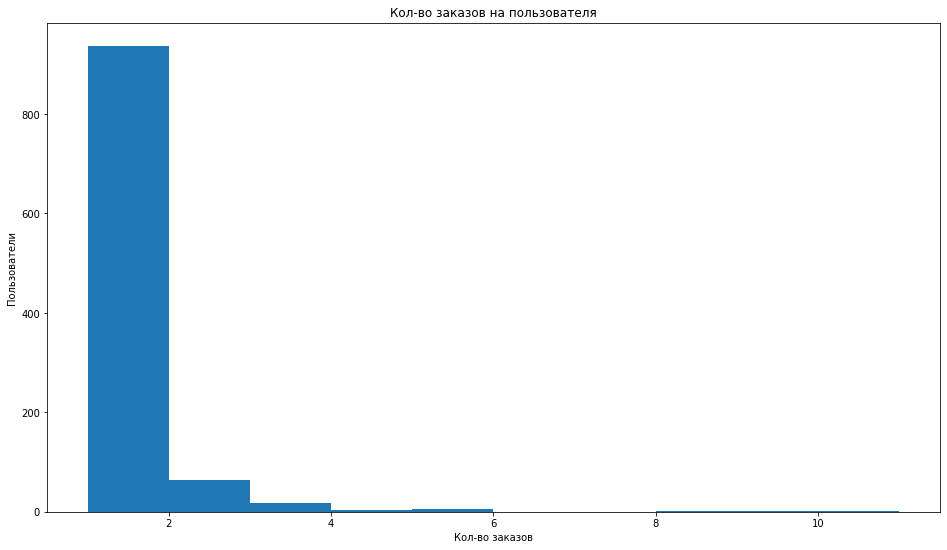

In [130]:
plt.figure(figsize=(16, 9))
plt.hist(ordersByUsers['orders']) 
plt.title('Кол-во заказов на пользователя')
plt.xlabel("Кол-во заказов")
plt.ylabel("Пользователи")

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже присутствует.
Построим точечную диаграмму числа заказов на одного пользователя:

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Пользователей с 2-4 заказами достаточно. Но на первый взгляд аномальны более высокие значения. Попробуем определить эту границу. Для этого посчитаем выборочные перцентили количества заказов на одного пользователя:

In [108]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 4.85 (т. е. 5) заказов. И 10% пользователей заказывали более трёх раз.
Разумно выбрать 4 или 5 заказов на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся в следующем урокеm

На основе полученных значений, возьмем за нижниюю границу величину в 2-3 заказа. 

Посмотрим на точечный график стоимостей заказов:

Text(0, 0.5, 'Стоимость')

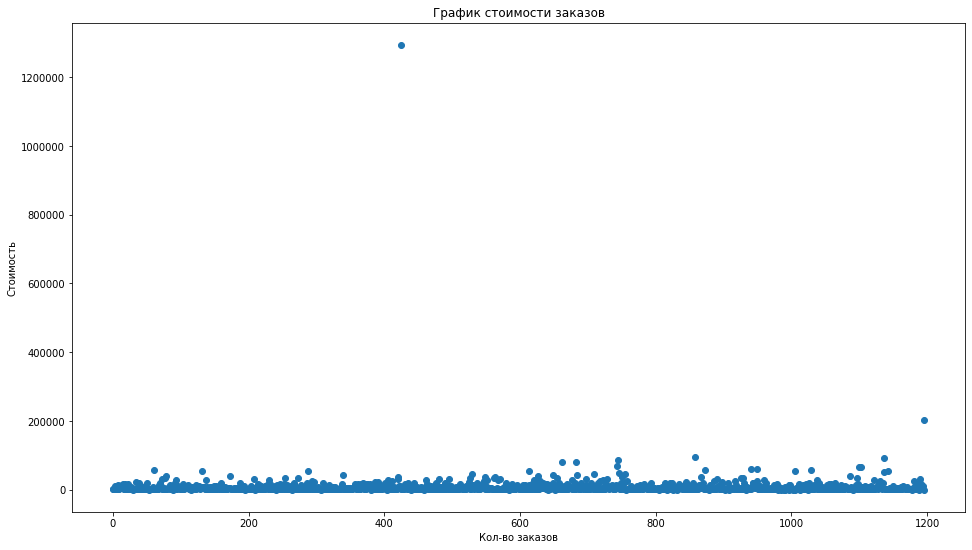

In [132]:
plt.figure(figsize=(16, 9))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимости заказов')
plt.xlabel("Кол-во заказов")
plt.ylabel("Стоимость")

Здесь ситуация менее "шумная".


Посчитаем 95-й и 99-й перцентили стоимости заказов для определения границы аномальных значений:

In [110]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Здеьс можно взять границу в 30 000 в качестве круглой цифры. Далее посмотрим на то, как это влияет на последующие выводы.

Расчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:

In [111]:
visitors.sample(1)

,date,group,visitors
3,2019-08-04,A,717


In [112]:
orders.sample(1)

,transactionId,visitorId,date,revenue,group
501,50573571,152397976,2019-08-04,490,B


In [113]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [114]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [115]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [116]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [117]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [118]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [119]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


Видим, что первое чило меньше значения р. Т.е. мы можем отвергнуть нулевую гипотезу о том, что значимых разлчий в конверсии между группами нет. Различия есть и они статитически значимы. Ну и прирост группы В - 13.8%. Что довольно таки не мало.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [120]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


Здесь результаты расчетов сильно больше P-value. Отвергнуть нулевую гипотезу мы не можем.  Ну и в абсолютных значениях разница тоже не сильно драматическая.

## Согласен. Нулевая гипотеза, как всегда негативная и мы говорим о том, что конверсия по группам не различается. Альтернативная гипотеза - конверсия по группам не равны между собой, т.е. отличие статистически значимо.

Теперь посмотрим на то, какие результаты мы получим, проведя аналогичных расчеты на данных очищенных от аномалий.

Начнем с конверсии.

Выше были определены границы для распределений наших значений по этим признакам. То было 3 и 30000. Сделаем соответствующие срезы и объединим все в таблице abnormalUsers.

In [121]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
(57,)


Получили 57 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [122]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [123]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.009
0.148


Видим, что по конверсии картинка не сильно менялась. Посмотрим на средний чек:

In [124]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.479
-0.020


P-value увеличился, вывод по результам тесте не меняем, хотя отмечаем сильное изменение в величине разницы.

Сделаем подитог того, что мы имеем:

1. Имеется  статистически значимое различие по конверсии между группами, как по «сырым»,так по отфильтрованных аномалий данным;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. Графики различий в конверсии и в серднем чеке подстрвеждают эту ситуацию. 

В сухом остатке мы имеем изменение в конверсии между двумя группами. Любопытно, что на графике увеличение конверсии по группе В сопровождалось падением конверсии по группе А. График с определнного момента практически "отзеркаливает" значения по двум группам. Из чего можно предположить, что закзазы из группы В могли каннибализировать заказы из группы А. Что косвенно подтверждает успешность эксперимента.

При этом, несмотря на то, что мы не имеем в наличии статистически значиного различия между группами по среднему чеку, у нас имеется довольно сильное различие по куммулятивной выручке. Выручка по обеим группам демонстрировала положительную динамику, но по группе В это происходило уровнем на порядок выше, что при прочих равных можно увязать с провдением эксмеримента, а именно с увеличившейся конверсией по этой группе. Ну а поскольку целью нашей гипотезы являлось собственно увеличение выручки, то предлагается признать эксперимент удачным и присвоить победу группе В.